In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# train_images = X_train
# train_labels = y_train
# test_images = X_test
# test_labels = y_test

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [4]:
# Normalize the pixel values to the range [0, 1]
#X_train, X_test = X_train / 255.0, X_test / 255.0

# Normalize the pixel values to the range -1 to 1
X_train = (X_train.astype(np.float32) / 127.5) - 1.0
X_test = (X_test.astype(np.float32) / 127.5) - 1.0

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
# a single image array (28x28):
print(X_train[0].shape)
#print(X_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
(28, 28)


In [6]:
from cv2 import resize

# Loop through the images, resize them to 16x16

X_train_res16 = []
for image in X_train:
    resized_image = resize(image, (16, 16))
    X_train_res16.append(resized_image)
X_train_res16 = np.array(X_train_res16)

X_test_res16 = []
for image in X_test:
    resized_image = resize(image, (16, 16))
    X_test_res16.append(resized_image)
X_test_res16 = np.array(X_test_res16)

print(X_train_res16.shape)
print(X_test_res16.shape)

(60000, 16, 16)
(10000, 16, 16)


In [7]:
# Normalize the pixel values to the range [0, 1]
#X_train_res16, X_test_res16 = X_train_res16 / 255.0, X_test_res16 / 255.0

print(X_train_res16[0])

[[-1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431
  -1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431
  -1.0078431  -1.0078431  -1.0078431  -1.0078431 ]
 [-1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431
  -1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431
  -1.0078431  -1.0078431  -1.0078431  -1.0078431 ]
 [-1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431
  -1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0078431
  -1.0078431  -1.0078431  -1.0078431  -1.0078431 ]
 [-1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0074106  -1.0061803
  -1.0022107  -0.9990273  -0.9977009  -0.9951807  -0.9951336  -0.99666566
  -0.9934035  -1.0031266  -1.0078431  -1.0078431 ]
 [-1.0078431  -1.0078431  -1.0078431  -1.0078431  -1.0010804  -0.9922799
  -0.9922799  -0.9922799  -0.99368703 -0.99244523 -1.0028133  -1.0046905
  -1.0059353  -1.0078431  -1.0078431  -1.0078431 ]
 [-1.0078431  

NameError: name 'image_index' is not defined

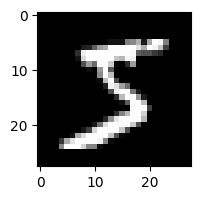

In [8]:
# Extract and display the selected image
def display_dig_img(image):
  plt.figure(figsize=(2, 2))
  plt.imshow(image, cmap='gray')  # Display the image in grayscale
  plt.title(f"Labelled as {y_train[image_index]}")
  #plt.axis('off')  # Hide axis labels
  plt.show()

display_dig_img(X_train[0])
display_dig_img(X_train_res16[0])
display_dig_img(X_train[1])
display_dig_img(X_train_res16[1])

In [9]:
# Flatten the original images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(X_train_flat.shape)
print(X_test_flat.shape)
#print(X_train_flat[0])

(60000, 784)
(10000, 784)


In [10]:
# Flatten the resized images
X_train_res16_flat = X_train_res16.reshape(X_train_res16.shape[0], -1)
X_test_res16_flat = X_test_res16.reshape(X_test_res16.shape[0], -1)
print(X_train_res16_flat.shape)
print(X_test_res16_flat.shape)

(60000, 256)
(10000, 256)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Convert labels to one-hot encoding - needed for NN
print(y_train[0])
y_train_ohe = to_categorical(y_train, 10)
y_test_ohe = to_categorical(y_test, 10)
print(y_train_ohe[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
'''
def init_weights2(input_pixels):
  # rand - random samples from a uniform distribution over [0, 1)
  weights = np.random.rand(input_pixels, 10) # input_features x output neurons
  return weights
'''

# to be used for the hidden layer(s)
def relu(x):
  return max(0, x)

# He initialization https://doi.org/10.48550/arXiv.1502.01852
def init_weights_he(input_pixels):
  # Calculate the standard deviation based on the formula
  std_dev = np.sqrt(2 / input_pixels)

  # Generate random numbers with a normal distribution
  weights = np.random.normal(loc=0.0, scale=std_dev, size=(input_pixels, 10))

  # Verify the mean and standard deviation of the generated numbers
  mean_generated = np.mean(weights)
  std_dev_generated = np.std(weights)
  print("He Distribution Mean:", mean_generated)
  print("He Distribution Standard Deviation:", std_dev_generated)
  return weights

 # to be used for the output layer - will return an array of probabilities where each element represents the probability of a class. The sum of all probabilities will be equal to 1
def softmax(logits):
    exp_logits = np.exp(logits)
    sum_exp_logits = np.sum(exp_logits)
    probabilities = exp_logits / sum_exp_logits
    return probabilities

# to be used with Sigmoid, Tanh and Sigmoid activation
# Xavier Glorot initialization
# Uniform Xavier Init
def init_weights_xavier(input_neurons, output_neurons):

    # Calculate the range for random initialization
    limit = np.sqrt(6 / (input_neurons + output_neurons))

    # Generate random weights within the specified range
    weights = np.random.uniform(-limit, limit, size=(input_neurons, output_neurons))

    return weights



biases = np.zeros(10)  # 1 bias for each output neuron

weights = init_weights_xavier(256, 10)
#print(f'Weights: \n{weights}')
#print(f'Biases: \n{biases}')
#print(f'Image: \n{X_train_res16_flat[0]}')
logits = np.dot(X_train_res16_flat[0], weights)+biases
#result = np.vectorize(relu)(result)  # <=> result = np.maximum(0, result)
probabilities = softmax(logits)
print(probabilities)
print(f'Weights: \n{weights}')
#print(f'Image: \n{X_train_res16_flat[0]}')
#     a = ReLU(np.dot(weights, a)+biases)


[0.07307658 0.03940128 0.03211859 0.11124146 0.08602388 0.11608614
 0.02672221 0.00899859 0.14825798 0.35807327]
Weights: 
[[ 0.11809604 -0.07536606  0.0487328  ... -0.04017134  0.1034798
  -0.14227073]
 [ 0.0572398   0.00298411  0.01437207 ... -0.00034737 -0.0155599
  -0.05428124]
 [ 0.14640005  0.00451404 -0.1064044  ... -0.12900311  0.14041516
   0.09122092]
 ...
 [ 0.14707373  0.06598979  0.05357578 ...  0.08073634  0.01117372
   0.03800768]
 [ 0.06136872  0.11943084 -0.06443906 ...  0.11491055 -0.13510033
   0.01113681]
 [ 0.13399497 -0.05511553  0.02872037 ... -0.13953735 -0.05870323
   0.07365326]]


In [ ]:

# Create a simple feedforward Neural Network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
#    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
model.fit(X_train, y_train_ohe, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test_ohe)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3022 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1435 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1051 - accuracy: 0.9693
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0835 - accuracy: 0.9747
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9747
Test accuracy: 0.9746999740600586


In [ ]:
# Create a simple feedforward neural network model
model = Sequential([
    Flatten(input_shape=(16, 16)),
#    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
model.fit(X_train_res16, y_train_ohe, epochs=5)

# Evaluate the model on the test dataset
test_loss2, test_accuracy2 = model.evaluate(X_test_res16, y_test_ohe)
print(f"Test accuracy: {test_accuracy2}")

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3943 - accuracy: 0.8930
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1985 - accuracy: 0.9430
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1505 - accuracy: 0.9566
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1223 - accuracy: 0.9645
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9688
Test accuracy: 0.9688000082969666


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Number of clusters (fuzzy sets)
num_clusters = 10

# Perform k-means clustering to generate fuzzy sets
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(x_train)

# Generate fuzzy membership values based on distance to cluster centers
fuzzy_memberships = kmeans.transform(x_train)

# Create fuzzy rules
def create_fuzzy_rules(memberships):
    rules = []
    for sample in memberships:
        rule = np.argmax(sample)  # Select the cluster with the highest membership
        rules.append(rule)
    return np.array(rules)

fuzzy_rules = create_fuzzy_rules(fuzzy_memberships)

# Make predictions using fuzzy rules
def fuzzy_predict(fuzzy_rules, memberships):
    predictions = []
    for i in range(len(fuzzy_rules)):
        predictions.append(np.argmax(memberships[i] == fuzzy_rules[i]))
    return np.array(predictions)

# Apply fuzzy logic classifier to the test data
test_fuzzy_memberships = kmeans.transform(x_test)
y_pred = fuzzy_predict(fuzzy_rules, test_fuzzy_memberships)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [11]:
#KNN #Naomy
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def knn_predict(X_train, y_train, X_test, k):
    num_test = X_test.shape[0]
    y_pred = np.zeros(num_test, dtype=int)

    for i in range(num_test):
        distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        y_pred[i] = np.argmax(np.bincount(nearest_labels))

    return y_pred

# Load the MNIST dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Make predictions using KNN
k = 5  # Number of neighbors
y_pred = knn_predict(X_train, y_train, X_test, k)

# Calculate the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9861111111111112


In [ ]:
# KNN1
input_features = 256 # 256 features -> X_train_res16_flat
weights = np.random.rand(input_features,output_features) # random samples from a uniform distribution over [0, 1)
